<a href="https://colab.research.google.com/github/Khuzamaalk/T5_BootCamp/blob/main/Ensemble_Task_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the dataset


In [183]:
df = pd.read_csv('/content/Traffic_Jams.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [184]:
df.shape

(6324, 9)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [186]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [187]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [188]:
df.duplicated().sum()

0

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [189]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [190]:
df['Traffic Situation'].sample(20)

,Traffic Situation
270,normal
4729,heavy
69,normal
1363,normal
662,normal
1603,heavy
2946,heavy
3977,heavy
1809,normal
2325,normal


In [191]:
# Label Encoder for the ( Traffic Situation ) and ( Day of the week ) columns, since it has an order

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Day of the week'] = label_encoder.fit_transform(df['Day of the week'])
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

In [192]:
# Convert the data type of ( Time ) and (Date ) columns
'''
df['Time'] = pd.to_datetime(df['Time'])
df['Date'] = pd.to_datetime(df['Date']) '''

df.drop('Time', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)

In [193]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']] = scaler.fit_transform(df[['Day of the week','CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']])'''

"from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\ndf[['Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']] = scaler.fit_transform(df[['Day of the week','CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']])"

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

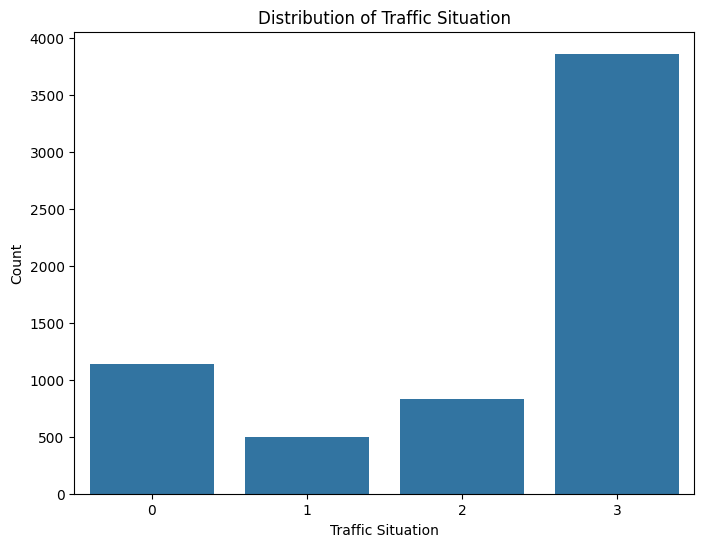

In [195]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

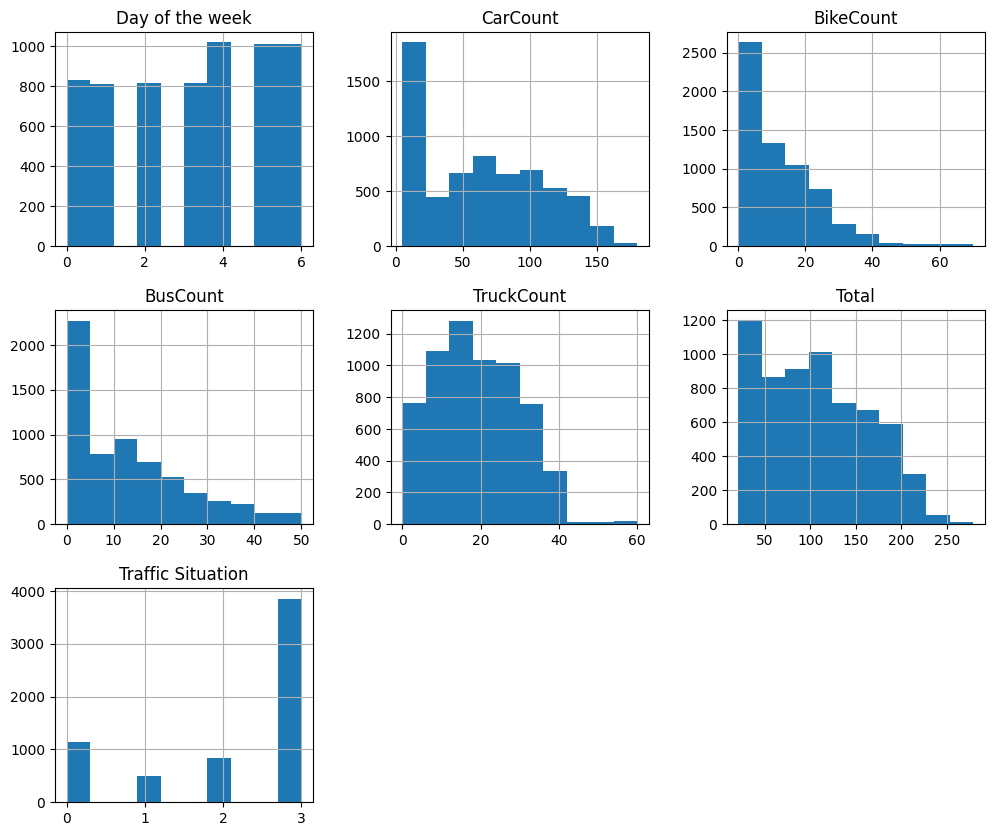

In [196]:
df.hist(figsize=(12, 10))
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [199]:
# 1) Define Features and Target
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']

In [200]:
# 2) Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [201]:
# Preprocess the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [202]:
base_estimator = KNeighborsClassifier()
bagging = BaggingClassifier(base_estimator, n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50,
                  random_state=42)

### Evaluate the model performance

In [203]:
y_pred = bagging.predict(X_test)
print("Bagging Classifier Accuracy Score", accuracy_score(y_test, y_pred))

Bagging Classifier Accuracy Score 0.8703352308665402


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [204]:
xgb = XGBClassifier(n_estimators=50, random_state=42)
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, pred)
print(f'XGBoost Classifier Model Accuracy: {accuracy * 100:.2f}%')

XGBoost Classifier Model Accuracy: 90.07%


### Evaluate the model performance

In [206]:
pred = xgb.predict(X_test)
print("Boosting Accuracy Score", accuracy_score(y_test, y_pred))

Boosting Accuracy Score 0.8703352308665402


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [207]:
base_models = [
    ('Bagging Classifier', BaggingClassifier(base_estimator, n_estimators=50, random_state=42)),
    ('XGBoost classifier', XGBClassifier(n_estimators=50, random_state=42))
]

### Define meta-learner (LogisticRegression)

In [208]:
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [209]:
from sklearn.ensemble import StackingClassifier
stck = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stck.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging Classifier',
                                BaggingClassifier(estimator=KNeighborsClassifier(),
                                                  n_estimators=50,
                                                  random_state=42)),
                               ('XGBoost classifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eva...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [210]:
y_pred = stck.predict(X_test)
print("Accuracy Score", accuracy_score(y_test, y_pred))

Accuracy Score 0.9057558507273877


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here: